In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install scikit-learn

In [3]:
import sklearn

In [4]:
from scipy.stats import pearsonr, spearmanr

In [5]:
pitch = pd.read_csv('pitch-arsenal-stats.csv')

In [6]:
pitch

,last_name,first_name,player_id,team_name_alt,pitch_type,pitch_name,run_value_per_100,run_value,pitches,pitch_usage,...,ba,slg,woba,whiff_percent,k_percent,put_away,est_ba,est_slg,est_woba,hard_hit_percent
0,Rodón,Carlos,607074,SF,FF,4-Seamer,-1.5,-16,1077,62.1,...,0.222,0.339,0.288,25.3,28.1,23.7,0.244,0.401,0.310,44.0
1,Gilbert,Logan,669302,SEA,FF,4-Seamer,-0.5,-6,1023,55.7,...,0.253,0.451,0.343,23.6,22.6,20.3,0.289,0.525,0.377,51.1
2,Manaea,Sean,640455,SD,SIFT,Sinker,-0.2,-1,983,62.5,...,0.222,0.369,0.308,24.4,23.3,20.8,0.248,0.427,0.333,43.1
3,Burnes,Corbin,669203,MIL,FC,Cutter,-2.1,-22,1032,56.7,...,0.187,0.271,0.261,31.7,26.0,25.3,0.246,0.373,0.307,38.5
4,McKenzie,Triston,663474,CLE,FF,4-Seamer,-0.8,-7,884,58.9,...,0.204,0.393,0.316,17.3,15.0,15.0,0.277,0.563,0.393,49.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Houser,Adrian,605288,MIL,FF,4-Seamer,1.3,3,225,16.6,...,0.255,0.426,0.334,20.6,38.0,20.0,0.206,0.378,0.272,35.7
711,De Jong,Chase,608328,PIT,SL,Slider,-2.6,-5,176,30.3,...,0.188,0.292,0.226,43.3,40.0,30.3,0.153,0.290,0.205,32.1
712,Rodríguez,Joely,570257,NYM,CH,Changeup,-0.7,-1,174,37.0,...,0.140,0.233,0.253,38.6,28.0,19.7,0.232,0.353,0.312,37.9
713,Adam,Jason,592094,TB,CH,Changeup,-2.5,-4,181,32.3,...,0.130,0.261,0.207,34.4,30.0,22.7,0.177,0.225,0.217,25.8


In [7]:
pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   last_name          715 non-null    object 
 1    first_name        715 non-null    object 
 2   player_id          715 non-null    int64  
 3   team_name_alt      715 non-null    object 
 4   pitch_type         715 non-null    object 
 5   pitch_name         715 non-null    object 
 6   run_value_per_100  715 non-null    float64
 7   run_value          715 non-null    int64  
 8   pitches            715 non-null    int64  
 9   pitch_usage        715 non-null    float64
 10  pa                 715 non-null    int64  
 11  ba                 715 non-null    float64
 12  slg                715 non-null    float64
 13  woba               715 non-null    float64
 14  whiff_percent      715 non-null    float64
 15  k_percent          715 non-null    float64
 16  put_away           715 non

In [8]:
pitch = pd.DataFrame(data=(pitch.query('pitch_name == "4-Seamer"')))

In [9]:
pitch

,last_name,first_name,player_id,team_name_alt,pitch_type,pitch_name,run_value_per_100,run_value,pitches,pitch_usage,...,ba,slg,woba,whiff_percent,k_percent,put_away,est_ba,est_slg,est_woba,hard_hit_percent
0,Rodón,Carlos,607074,SF,FF,4-Seamer,-1.5,-16,1077,62.1,...,0.222,0.339,0.288,25.3,28.1,23.7,0.244,0.401,0.310,44.0
1,Gilbert,Logan,669302,SEA,FF,4-Seamer,-0.5,-6,1023,55.7,...,0.253,0.451,0.343,23.6,22.6,20.3,0.289,0.525,0.377,51.1
4,McKenzie,Triston,663474,CLE,FF,4-Seamer,-0.8,-7,884,58.9,...,0.204,0.393,0.316,17.3,15.0,15.0,0.277,0.563,0.393,49.4
6,Pivetta,Nick,601713,BOS,FF,4-Seamer,-1.0,-9,890,50.8,...,0.210,0.395,0.310,19.7,20.2,20.2,0.250,0.520,0.364,49.7
7,Strider,Spencer,675911,ATL,FF,4-Seamer,-1.2,-10,892,68.6,...,0.192,0.295,0.262,28.7,34.2,26.0,0.227,0.402,0.312,43.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,King,Michael,650633,NYY,FF,4-Seamer,1.2,2,167,22.6,...,0.222,0.378,0.313,34.5,39.2,29.0,0.222,0.391,0.327,65.4
699,Rucker,Michael,621074,CHC,FF,4-Seamer,0.1,0,197,47.4,...,0.225,0.400,0.343,22.4,16.0,16.3,0.255,0.466,0.354,38.2
705,Cotton,Jharel,605194,MIN,FF,4-Seamer,-1.7,-4,238,47.8,...,0.244,0.512,0.372,19.8,6.0,7.1,0.270,0.542,0.390,23.1
706,García,Jarlín,606424,SF,FF,4-Seamer,-0.8,-2,199,39.6,...,0.217,0.370,0.305,14.7,20.0,19.6,0.267,0.476,0.342,50.0


In [10]:
pitch = pd.DataFrame(data=(pitch.query('pitch_usage >= 50')))

In [11]:
pitch

,last_name,first_name,player_id,team_name_alt,pitch_type,pitch_name,run_value_per_100,run_value,pitches,pitch_usage,...,ba,slg,woba,whiff_percent,k_percent,put_away,est_ba,est_slg,est_woba,hard_hit_percent
0,Rodón,Carlos,607074,SF,FF,4-Seamer,-1.5,-16,1077,62.1,...,0.222,0.339,0.288,25.3,28.1,23.7,0.244,0.401,0.310,44.0
1,Gilbert,Logan,669302,SEA,FF,4-Seamer,-0.5,-6,1023,55.7,...,0.253,0.451,0.343,23.6,22.6,20.3,0.289,0.525,0.377,51.1
4,McKenzie,Triston,663474,CLE,FF,4-Seamer,-0.8,-7,884,58.9,...,0.204,0.393,0.316,17.3,15.0,15.0,0.277,0.563,0.393,49.4
6,Pivetta,Nick,601713,BOS,FF,4-Seamer,-1.0,-9,890,50.8,...,0.210,0.395,0.310,19.7,20.2,20.2,0.250,0.520,0.364,49.7
7,Strider,Spencer,675911,ATL,FF,4-Seamer,-1.2,-10,892,68.6,...,0.192,0.295,0.262,28.7,34.2,26.0,0.227,0.402,0.312,43.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,Thornburg,Tyler,592804,MIN,FF,4-Seamer,0.7,2,210,58.0,...,0.213,0.319,0.322,20.2,15.5,15.0,0.179,0.305,0.294,38.5
638,Taylor,Blake,642130,HOU,FF,4-Seamer,-0.4,-1,226,74.1,...,0.250,0.292,0.305,16.2,8.9,8.8,0.279,0.407,0.350,30.2
662,Quijada,José,650671,LAA,FF,4-Seamer,-1.3,-3,220,80.6,...,0.191,0.277,0.262,39.7,40.0,27.5,0.137,0.227,0.229,38.5
667,Hughes,Brandon,676714,CHC,FF,4-Seamer,-0.4,-1,224,52.0,...,0.222,0.400,0.341,20.4,27.8,21.1,0.235,0.457,0.344,38.7


In [12]:
spearmanr(pitch['whiff_percent'], pitch['k_percent'])

SpearmanrResult(correlation=0.8039931689089356, pvalue=1.1689358580953806e-20)

In [13]:
pitch[['whiff_percent', 'k_percent']].mean()

whiff_percent    23.141860
k_percent        22.053488
dtype: float64

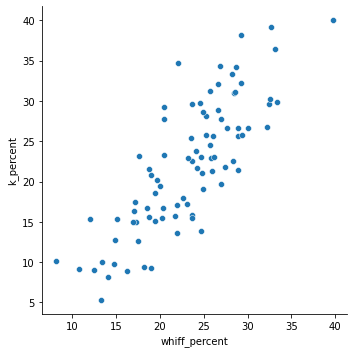

In [14]:
sns.relplot(data=pitch, x='whiff_percent', y='k_percent')

In [15]:
pitch.corr()

,player_id,run_value_per_100,run_value,pitches,pitch_usage,pa,ba,slg,woba,whiff_percent,k_percent,put_away,est_ba,est_slg,est_woba,hard_hit_percent
player_id,1.000000,-0.069773,-0.017652,0.150179,-0.292645,0.132422,-0.064134,-0.066005,-0.056006,0.106823,0.141051,0.166224,-0.103978,-0.124523,-0.102115,0.030686
run_value_per_100,-0.069773,1.000000,0.901857,-0.009716,-0.107347,-0.016940,0.749225,0.778306,0.853704,-0.528565,-0.541343,-0.602587,0.571079,0.539528,0.604602,0.008483
run_value,-0.017652,0.901857,1.000000,-0.170829,-0.084757,-0.182531,0.709458,0.709312,0.805064,-0.443832,-0.499590,-0.528902,0.551313,0.493143,0.588019,-0.035236
pitches,0.150179,-0.009716,-0.170829,1.000000,-0.152910,0.986492,0.014627,0.056902,0.015241,-0.041198,0.083547,0.080888,0.032272,0.012674,0.019299,0.080775
pitch_usage,-0.292645,-0.107347,-0.084757,-0.152910,1.000000,-0.144809,-0.172402,-0.221419,-0.155752,0.091718,-0.053352,-0.065602,-0.149515,-0.172384,-0.128267,-0.287409
pa,0.132422,-0.016940,-0.182531,0.986492,-0.144809,1.000000,0.025373,0.058586,0.012888,-0.100229,0.034354,0.065267,0.065880,0.024684,0.028178,0.085180
ba,-0.064134,0.749225,0.709458,0.014627,-0.172402,0.025373,1.000000,0.818890,0.883340,-0.615742,-0.641703,-0.621313,0.779666,0.572703,0.612038,0.047300
slg,-0.066005,0.778306,0.709312,0.056902,-0.221419,0.058586,0.818890,1.000000,0.912809,-0.546076,-0.524103,-0.533260,0.682439,0.781147,0.717816,0.211815
woba,-0.056006,0.853704,0.805064,0.015241,-0.155752,0.012888,0.883340,0.912809,1.000000,-0.622941,-0.676364,-0.669081,0.750465,0.700811,0.776136,0.150240
whiff_percent,0.106823,-0.528565,-0.443832,-0.041198,0.091718,-0.100229,-0.615742,-0.546076,-0.622941,1.000000,0.808045,0.750389,-0.699284,-0.531527,-0.618018,-0.182930


In [16]:
reg = np.polyfit(pitch['whiff_percent'], pitch['k_percent'], deg = 1)
reg

array([ 1.10668738, -3.55731647])

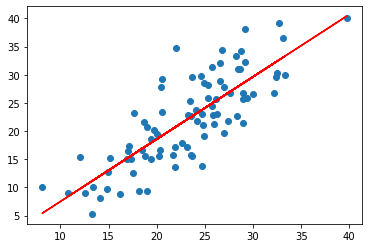

In [17]:
trend = np.polyval(reg, pitch['whiff_percent'])
plt.scatter(pitch['whiff_percent'], pitch['k_percent'])
plt.plot(pitch['whiff_percent'], trend, 'r')

In [18]:
predict = np.poly1d(reg)
predict(50)

51.77705234780674

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [22]:
x = pitch['whiff_percent'].values.reshape(-1,1)
y = pitch['k_percent']

print(x)
print(y)

[[25.3]
 [23.6]
 [17.3]
 [19.7]
 [28.7]
 [28.4]
 [32.7]
 [29.2]
 [15.1]
 [26.1]
 [18.8]
 [25.7]
 [24.2]
 [17.5]
 [18.7]
 [19. ]
 [24.1]
 [13.4]
 [14.9]
 [12.5]
 [18.5]
 [26.6]
 [23.5]
 [22. ]
 [25.9]
 [17. ]
 [19.4]
 [22.6]
 [21.7]
 [20.3]
 [16.9]
 [21.9]
 [10.8]
 [17.1]
 [12. ]
 [28.6]
 [20.5]
 [20. ]
 [14.8]
 [23.6]
 [27.4]
 [28.9]
 [32.4]
 [32.2]
 [19.4]
 [25.3]
 [24.6]
 [23.1]
 [28.2]
 [29.4]
 [24.9]
 [33.3]
 [28.9]
 [18.2]
 [33.1]
 [26.6]
 [28.9]
 [23.7]
 [25.7]
 [25.8]
 [23.7]
 [27. ]
 [24.9]
 [29.2]
 [32.5]
 [13.3]
 [27.6]
 [20.5]
 [23.2]
 [17.6]
 [ 8.1]
 [21.9]
 [24.7]
 [26.8]
 [30. ]
 [28.3]
 [24.8]
 [27. ]
 [24.7]
 [26.2]
 [14.1]
 [20.2]
 [16.2]
 [39.7]
 [20.4]
 [19. ]]
0      28.1
1      22.6
4      15.0
6      20.2
7      34.2
       ... 
606    15.5
638     8.9
662    40.0
667    27.8
668     9.3
Name: k_percent, Length: 86, dtype: float64


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [24]:
model = LinearRegression()

In [38]:
model.fit(x_train, y_train)

LinearRegression()

In [41]:
model.score(x_test, y_test)

0.7748556998298515

In [26]:
predictions = model.predict(x_test)

In [27]:
predictions

array([23.24340184, 18.78567785, 24.11320165, 27.70112583, 28.46220066,
       32.59374972, 25.96152623, 15.41520362, 18.133328  , 22.69977697,
       11.5011045 , 15.52392859, 22.59105199, 15.85010352, 21.61252721,
       16.06755347, 32.2675748 , 23.8957517 , 15.63265357, 17.37225317,
       24.98300145, 33.24609958, 17.15480322, 40.204498  ,  8.78298012,
       24.54810155])

In [28]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  16.361449447731722
mean_absolute_error :  3.096318267882424


In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7748556998298515

Text(0, 0.5, 'predicted value')

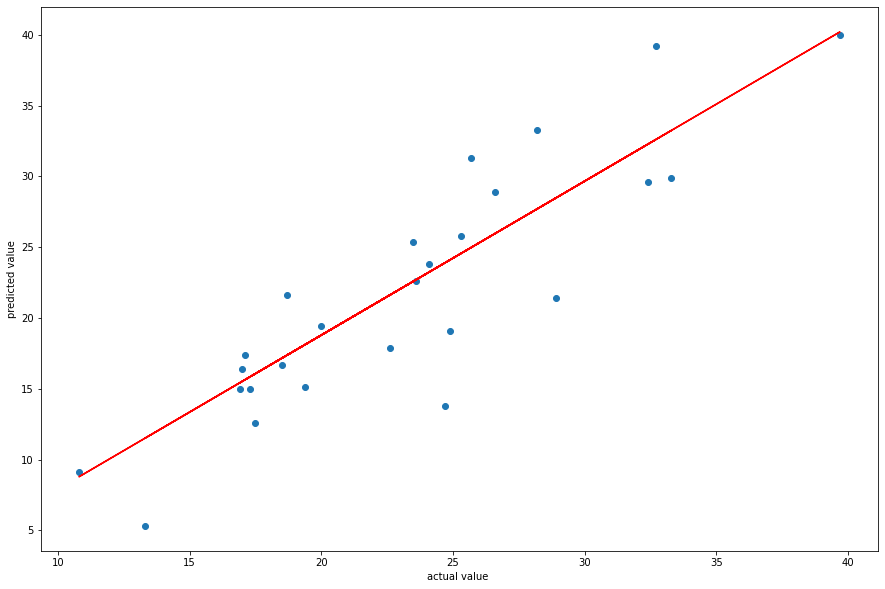

In [46]:
plt.figure(figsize=(15,10))
plt.scatter(x_test, y_test)
plt.plot(x_test, predictions, color='red')
plt.xlabel('actual value ')
plt.ylabel('predicted value')

In [32]:
pred_df = pd.DataFrame({'actual':y_test, 'Predicted value':predictions, 'difference': y_test-predictions})
pred_df

,actual,Predicted value,difference
36,23.8,23.243402,0.556598
230,19.4,18.785678,0.614322
322,19.1,24.113202,-5.013202
311,33.3,27.701126,5.598874
346,21.4,28.462201,-7.062201
9,39.2,32.593750,6.606250
94,28.9,25.961526,2.938474
182,15.0,15.415204,-0.415204
156,15.1,18.133328,-3.033328
1,22.6,22.699777,-0.099777


In [34]:
pred_df["difference"].mean()

-0.4901222618975117

In [35]:
from scipy import stats

In [36]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,predictions)

confidence = 2.58*std_err

In [37]:
confidence

0.2084486005346643

I conclude that when a pitcher can achieve a higher swing and miss percentage he will strike out more batters at a higher percentage rate. I am confident in this assesment due to a high r^2 value and linear graphs I have shown. There are some things that could change the look of the data that not in here such as striking out looking and walks. if I was to do a multilinear regression I would use put away percentage with my swing and miss percentage. 